In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import sklearn

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020879BBDAC8>,
      dtype=object)

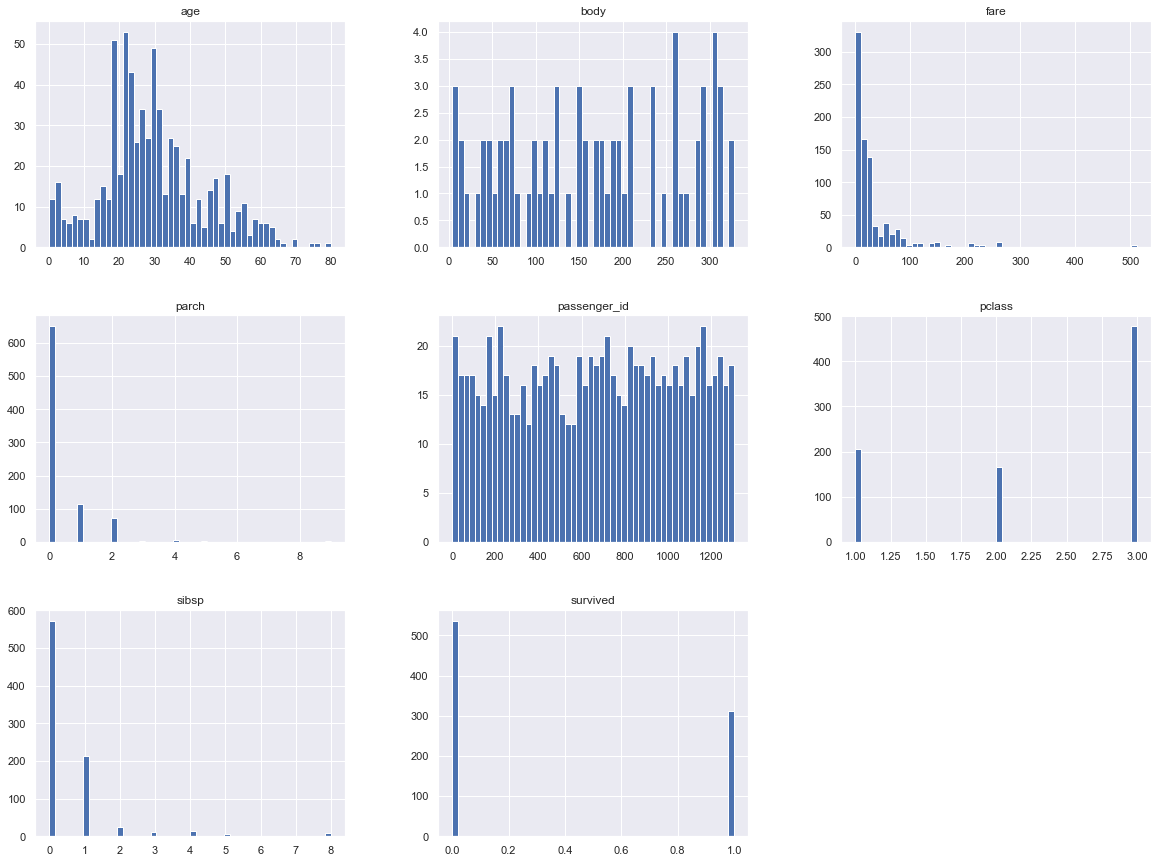

In [2]:
data=pd.read_csv('titanic_train.csv')
data.hist(bins=50, figsize=(20,15))


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
passenger_id    850 non-null int64
pclass          850 non-null int64
name            850 non-null object
sex             850 non-null object
age             676 non-null float64
sibsp           850 non-null int64
parch           850 non-null int64
ticket          850 non-null object
fare            849 non-null float64
cabin           191 non-null object
embarked        849 non-null object
boat            308 non-null object
body            73 non-null float64
home.dest       464 non-null object
survived        850 non-null int64
dtypes: float64(3), int64(5), object(7)
memory usage: 99.7+ KB


In [4]:
data.describe(include='all')

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
count,850.000000,850.00000,850,850,676.000000,850.000000,850.000000,850,849.000000,191,849,308,73.000000,464,850.000000
unique,NaN,NaN,849,2,NaN,NaN,NaN,660,NaN,135,3,26,NaN,272,NaN
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,CA. 2343,NaN,C22 C26,S,4,NaN,"New York, NY",NaN
freq,NaN,NaN,2,551,NaN,NaN,NaN,10,NaN,4,589,25,NaN,36,NaN
mean,662.816471,2.32000,NaN,NaN,29.519847,0.522353,0.382353,NaN,34.012701,NaN,NaN,NaN,165.821918,NaN,0.368235
std,380.751936,0.83853,NaN,NaN,14.562243,1.112132,0.879511,NaN,53.705779,NaN,NaN,NaN,99.068487,NaN,0.482610
min,1.000000,1.00000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,4.000000,NaN,0.000000
25%,332.250000,2.00000,NaN,NaN,20.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,75.000000,NaN,0.000000
50%,676.500000,3.00000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.108300,NaN,NaN,NaN,166.000000,NaN,0.000000
75%,992.250000,3.00000,NaN,NaN,37.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN,NaN,260.000000,NaN,1.000000


In [5]:
data['age'].isnull().sum()

174

In [6]:
data['age'].isnull()

0       True
1      False
2      False
3      False
4      False
       ...  
845    False
846    False
847    False
848    False
849    False
Name: age, Length: 850, dtype: bool

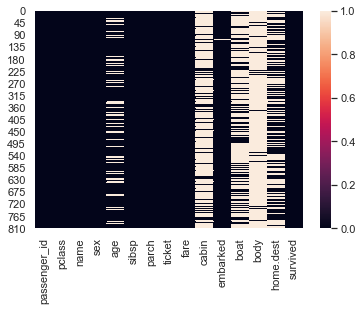

In [7]:
sns.heatmap(data.isnull())#, yticklabels=False, cmap='BuPu')

In [8]:
df=data.copy()
df

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,NaN,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.0,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.0,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.0,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.0,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55.0,0,0,680,50.0000,C39,S,NaN,NaN,London / Birmingham,0
846,174,1,"Kent, Mr. Edward Austin",male,58.0,0,0,11771,29.7000,B37,C,NaN,258.0,"Buffalo, NY",0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.0,1,0,244367,26.0000,NaN,S,12,NaN,"Moscow / Bronx, NY",1
848,1112,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,NaN,NaN,NaN,0


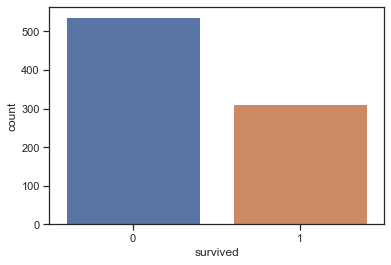

In [9]:
sns.set_style("ticks")
sns.countplot(df['survived'])

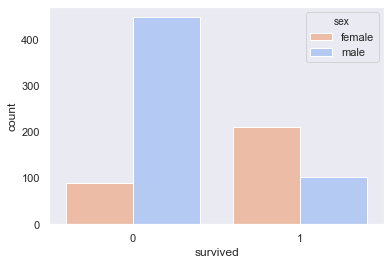

In [10]:
sns.set_style("dark")
sns.countplot(df['survived'], hue=df['sex'], palette='coolwarm_r' )

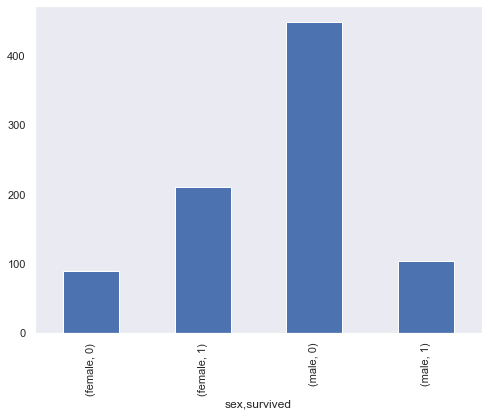

In [11]:
df.groupby(['sex', 'survived'] )['survived'].count().plot.bar(figsize=(8, 6))

In [12]:
df.groupby(['sex', 'survived'] )['survived'].count().unstack(1)

survived,0,1
sex,,
female,89,210
male,448,103


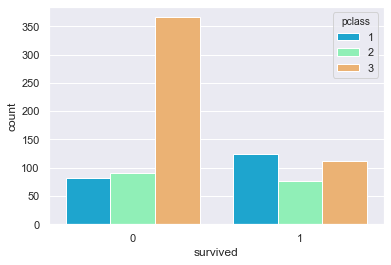

In [13]:
sns.set_style("darkgrid")
sns.countplot(df['survived'], hue=df['pclass'], palette='rainbow' )

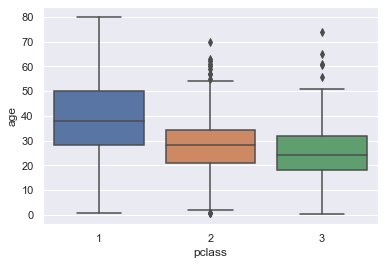

In [14]:
sns.boxplot(df['pclass'], df['age'])

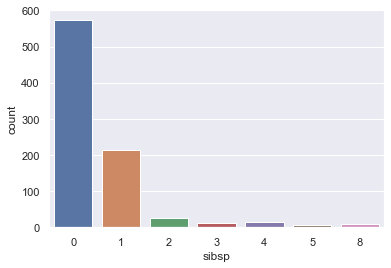

In [15]:
sns.countplot(df['sibsp'])

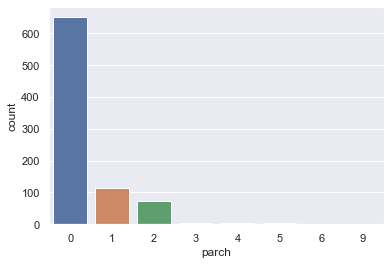

In [16]:
sns.countplot(df['parch'])

In [17]:
a=df[['pclass', 'survived']].groupby(df['pclass'],as_index=False).mean().sort_values(by='survived', ascending =False)
a

,pclass,survived
0,1.0,0.606796
1,2.0,0.457831
2,3.0,0.234310


In [18]:
df[['sex','survived']].groupby(df['sex'], as_index=False).mean().sort_values(by='survived', ascending=False)

,survived
0,0.702341
1,0.186933


In [19]:
pd.crosstab(df['sex'], df['survived'], margins=True)


survived,0,1,All
sex,,,
female,89,210,299
male,448,103,551
All,537,313,850


In [20]:
df.groupby(df['sex']).survived.mean()

sex
female    0.702341
male      0.186933
Name: survived, dtype: float64

In [21]:
df[['pclass','survived']].groupby(df['pclass'], as_index=False).mean()

,pclass,survived
0,1.0,0.606796
1,2.0,0.457831
2,3.0,0.234310


In [22]:

table = pd.crosstab(df['survived'],df['pclass'])
table

pclass,1,2,3
survived,,,
0,81,90,366
1,125,76,112


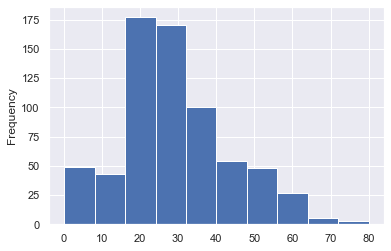

In [23]:
df['age'].plot.hist() # or use df['age'].plot(kind='hist')  or sns.distplot(df['age'].dropna(),kde=False, bins=20)

In [24]:
df['age'].fillna(df.age.mean(), inplace=True) #or df['age'].fillna(29, inplace=True)
df

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1216,3,"Smyth, Miss. Julia",female,29.519847,0,0,335432,7.7333,NaN,Q,13,NaN,NaN,1
1,699,3,"Cacic, Mr. Luka",male,38.000000,0,0,315089,8.6625,NaN,S,NaN,NaN,Croatia,0
2,1267,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.000000,1,1,345773,24.1500,NaN,S,NaN,NaN,NaN,0
3,449,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.000000,1,3,29105,23.0000,NaN,S,4,NaN,"Cornwall / Akron, OH",1
4,576,2,"Veal, Mr. James",male,40.000000,0,0,28221,13.0000,NaN,S,NaN,NaN,"Barre, Co Washington, VT",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,158,1,"Hipkins, Mr. William Edward",male,55.000000,0,0,680,50.0000,C39,S,NaN,NaN,London / Birmingham,0
846,174,1,"Kent, Mr. Edward Austin",male,58.000000,0,0,11771,29.7000,B37,C,NaN,258.0,"Buffalo, NY",0
847,467,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.000000,1,0,244367,26.0000,NaN,S,12,NaN,"Moscow / Bronx, NY",1
848,1112,3,"Peacock, Miss. Treasteall",female,3.000000,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S,NaN,NaN,NaN,0


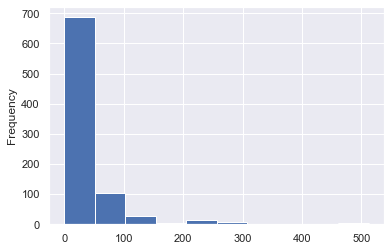

In [25]:
df['fare'].plot.hist() or sns.distplot(df['fare'].dropna(),kde=False, bins=20)

In [26]:
df.drop(['body'], axis=1, inplace=True)


In [27]:
df.drop(['cabin'], axis=1, inplace=True)

In [28]:
df.drop(['boat'], axis=1, inplace=True)

In [29]:
df.drop(['home.dest'], axis=1, inplace=True)

In [30]:
df.drop(['passenger_id'], axis=1, inplace=True)

In [31]:
df.isnull().sum()

pclass      0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        1
embarked    1
survived    0
dtype: int64

In [32]:
df_nomissval=df.dropna()

In [33]:
df_nomissval.describe()

,pclass,age,sibsp,parch,fare,survived
count,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000
mean,2.320755,29.473314,0.523585,0.383255,33.958471,0.367925
std,0.837968,12.952837,1.113154,0.880352,53.714209,0.482525
min,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,29.519847,0.000000,0.000000,14.054150,0.000000
75%,3.000000,34.500000,1.000000,0.000000,30.771850,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [34]:
y=df_nomissval.corr()

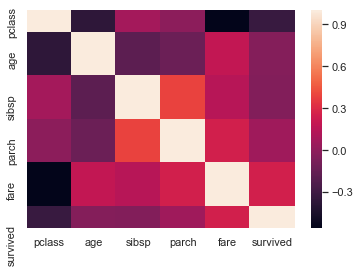

In [35]:
sns.heatmap(y)

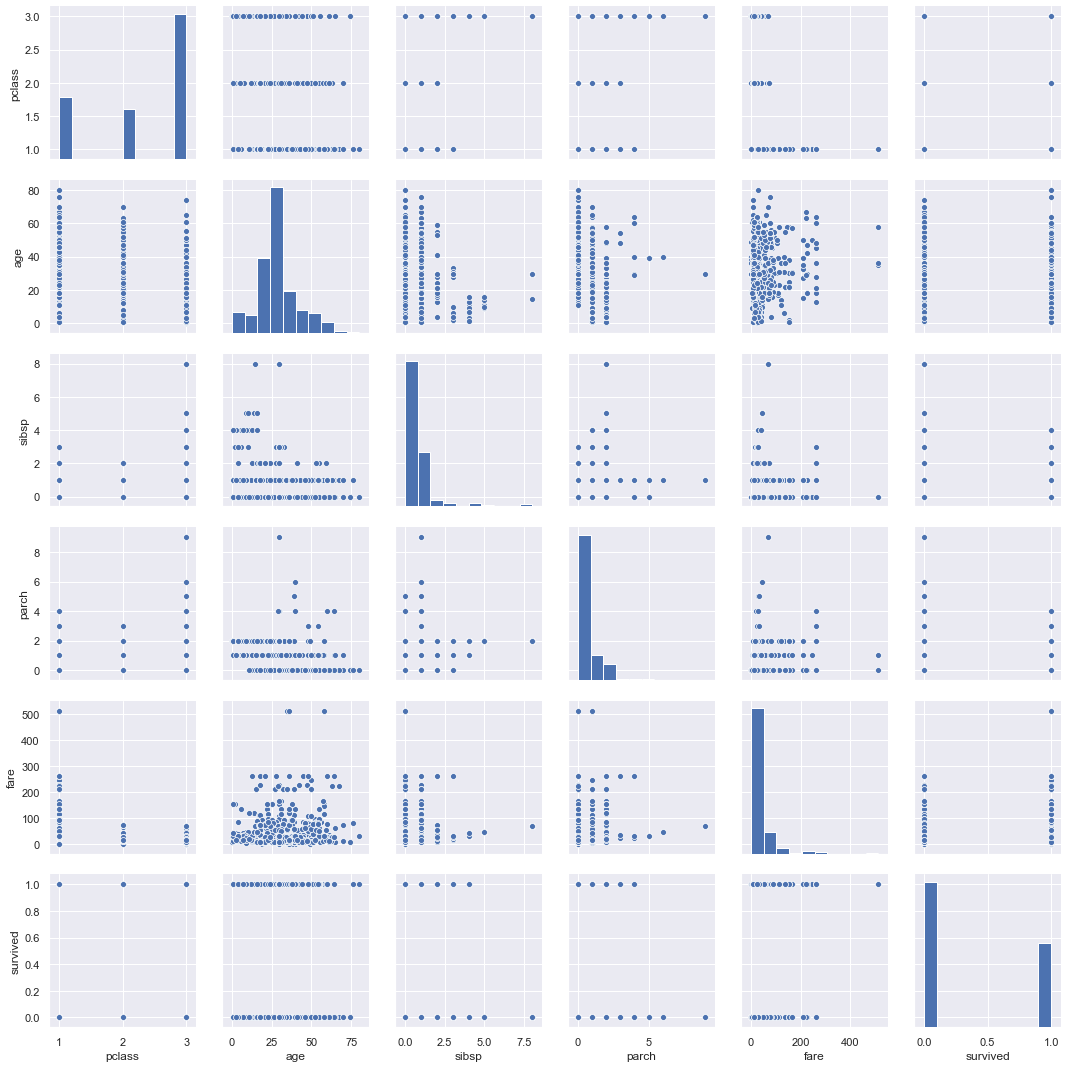

In [36]:
sns.pairplot(df_nomissval)

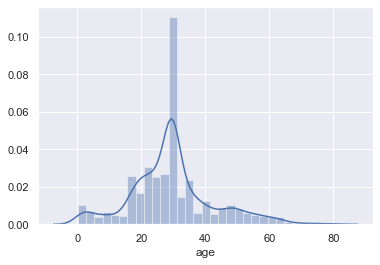

In [37]:
sns.distplot(df_nomissval['age'])

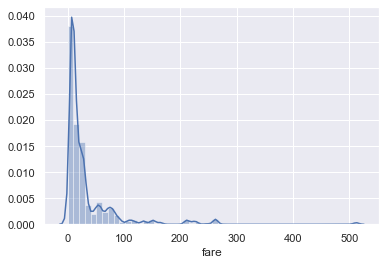

In [38]:
sns.distplot(df_nomissval['fare']) # we can see some outliers and so we should remove them

In [39]:
df_nomissval.drop(['ticket'], axis=1, inplace=True)

C:\Users\Sanya Jain\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [40]:
df_nomissval

,pclass,name,sex,age,sibsp,parch,fare,embarked,survived
0,3,"Smyth, Miss. Julia",female,29.519847,0,0,7.7333,Q,1
1,3,"Cacic, Mr. Luka",male,38.000000,0,0,8.6625,S,0
2,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",female,30.000000,1,1,24.1500,S,0
3,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",female,54.000000,1,3,23.0000,S,1
4,2,"Veal, Mr. James",male,40.000000,0,0,13.0000,S,0
...,...,...,...,...,...,...,...,...,...
845,1,"Hipkins, Mr. William Edward",male,55.000000,0,0,50.0000,S,0
846,1,"Kent, Mr. Edward Austin",male,58.000000,0,0,29.7000,C,0
847,2,"Kantor, Mrs. Sinai (Miriam Sternin)",female,24.000000,1,0,26.0000,S,1
848,3,"Peacock, Miss. Treasteall",female,3.000000,1,1,13.7750,S,0


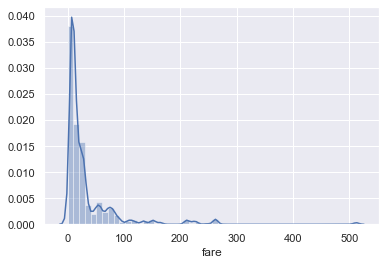

In [41]:
q=df_nomissval['fare'].quantile(.05)
df_fareout=df_nomissval[df_nomissval['fare']>q]
sns.distplot(df_nomissval['fare'])

In [42]:
df_fareout.describe(include='all')

,pclass,name,sex,age,sibsp,parch,fare,embarked,survived
count,801.000000,801,801,801.000000,801.000000,801.000000,801.000000,801,801.000000
unique,NaN,800,2,NaN,NaN,NaN,NaN,3,NaN
top,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,NaN,S,NaN
freq,NaN,2,505,NaN,NaN,NaN,NaN,563,NaN
mean,2.298377,NaN,NaN,29.407706,0.550562,0.404494,35.645479,NaN,0.384519
std,0.840898,NaN,NaN,13.114307,1.138092,0.900655,54.797730,NaN,0.486785
min,1.000000,NaN,NaN,0.166700,0.000000,0.000000,7.229200,NaN,0.000000
25%,2.000000,NaN,NaN,22.000000,0.000000,0.000000,8.050000,NaN,0.000000
50%,3.000000,NaN,NaN,29.519847,0.000000,0.000000,15.245800,NaN,0.000000
75%,3.000000,NaN,NaN,34.000000,1.000000,0.000000,31.500000,NaN,1.000000


In [43]:
df_nomissval.describe(include='all')

,pclass,name,sex,age,sibsp,parch,fare,embarked,survived
count,848.000000,848,848,848.000000,848.000000,848.000000,848.000000,848,848.000000
unique,NaN,847,2,NaN,NaN,NaN,NaN,3,NaN
top,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,NaN,S,NaN
freq,NaN,2,550,NaN,NaN,NaN,NaN,588,NaN
mean,2.320755,NaN,NaN,29.473314,0.523585,0.383255,33.958471,NaN,0.367925
std,0.837968,NaN,NaN,12.952837,1.113154,0.880352,53.714209,NaN,0.482525
min,1.000000,NaN,NaN,0.166700,0.000000,0.000000,0.000000,NaN,0.000000
25%,2.000000,NaN,NaN,22.000000,0.000000,0.000000,7.895800,NaN,0.000000
50%,3.000000,NaN,NaN,29.519847,0.000000,0.000000,14.054150,NaN,0.000000
75%,3.000000,NaN,NaN,34.500000,1.000000,0.000000,30.771850,NaN,1.000000


In [44]:
df_mapped=df_nomissval.copy()

In [45]:
df_mapped['sex']=df_mapped['sex'].map({'male':0, 'female':1})


In [46]:
#df_mapped['embarked']=df_mapped['embarked'].map({'Q':0, 'S':1, 'C':2}) didnt work
df_mapped['embarked'] = df_mapped['embarked'].map( {'S': 1, 'C': 2, 'Q': 3} )
df_mapped

,pclass,name,sex,age,sibsp,parch,fare,embarked,survived
0,3,"Smyth, Miss. Julia",1,29.519847,0,0,7.7333,3,1
1,3,"Cacic, Mr. Luka",0,38.000000,0,0,8.6625,1,0
2,3,"Van Impe, Mrs. Jean Baptiste (Rosalie Paula Go...",1,30.000000,1,1,24.1500,1,0
3,2,"Hocking, Mrs. Elizabeth (Eliza Needs)",1,54.000000,1,3,23.0000,1,1
4,2,"Veal, Mr. James",0,40.000000,0,0,13.0000,1,0
...,...,...,...,...,...,...,...,...,...
845,1,"Hipkins, Mr. William Edward",0,55.000000,0,0,50.0000,1,0
846,1,"Kent, Mr. Edward Austin",0,58.000000,0,0,29.7000,2,0
847,2,"Kantor, Mrs. Sinai (Miriam Sternin)",1,24.000000,1,0,26.0000,1,1
848,3,"Peacock, Miss. Treasteall",1,3.000000,1,1,13.7750,1,0


In [47]:
df_mapped.describe(include='all')

,pclass,name,sex,age,sibsp,parch,fare,embarked,survived
count,848.000000,848,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000,848.000000
unique,NaN,847,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,"Kelly, Mr. James",NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2.320755,NaN,0.351415,29.473314,0.523585,0.383255,33.958471,1.405660,0.367925
std,0.837968,NaN,0.477694,12.952837,1.113154,0.880352,53.714209,0.663123,0.482525
min,1.000000,NaN,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.000000,NaN,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000,0.000000
50%,3.000000,NaN,0.000000,29.519847,0.000000,0.000000,14.054150,1.000000,0.000000
75%,3.000000,NaN,1.000000,34.500000,1.000000,0.000000,30.771850,2.000000,1.000000


In [48]:
targets=df_mapped['survived']
df_mapped.shape

(848, 9)

In [49]:
df_mapp_new=df_mapped.drop(['name'], axis=1, inplace=True)


In [50]:
unscaled_data=df_mapped.iloc[:, :7]
unscaled_data

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,1,29.519847,0,0,7.7333,3
1,3,0,38.000000,0,0,8.6625,1
2,3,1,30.000000,1,1,24.1500,1
3,2,1,54.000000,1,3,23.0000,1
4,2,0,40.000000,0,0,13.0000,1
...,...,...,...,...,...,...,...
845,1,0,55.000000,0,0,50.0000,1
846,1,0,58.000000,0,0,29.7000,2
847,2,1,24.000000,1,0,26.0000,1
848,3,1,3.000000,1,1,13.7750,1


In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
survived=StandardScaler()

In [53]:
survived.fit(unscaled_data)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [54]:
scaled_data=survived.transform(unscaled_data)

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
train_test_split(scaled_data, targets)

[array([[-1.57707065,  1.35854245,  2.35814758, ..., -0.43559931,
          0.78858486,  0.89680283],
        [ 0.8110649 , -0.736083  , -0.88629886, ..., -0.43559931,
         -0.4882123 , -0.61210352],
        [ 0.8110649 , -0.736083  ,  0.00359464, ..., -0.43559931,
         -0.48262389, -0.61210352],
        ...,
        [-1.57707065,  1.35854245,  0.19518329, ..., -0.43559931,
          0.78858486,  0.89680283],
        [ 0.8110649 , -0.736083  ,  0.11793456, ..., -0.43559931,
         -0.48495239, -0.61210352],
        [-0.38300287,  1.35854245, -0.50005524, ..., -0.43559931,
         -0.3756673 ,  0.89680283]]),
 array([[ 8.11064905e-01,  1.35854245e+00,  3.59464421e-03, ...,
         -4.35599310e-01, -4.88212297e-01,  2.40570918e+00],
        [-3.83002872e-01, -7.36082999e-01,  3.49680736e-01, ...,
         -4.35599310e-01, -1.48250666e-01, -6.12103520e-01],
        [-1.57707065e+00,  1.35854245e+00,  1.43116288e+00, ...,
          2.97413806e+00,  4.25495101e+00,  8.96802832e-

In [57]:
x_train, x_test, y_train, y_test=train_test_split(scaled_data,targets, train_size=0.8, random_state=1)

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [59]:
reg=LogisticRegression()

In [60]:
reg.fit(x_train, y_train)


C:\Users\Sanya Jain\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [61]:
predictions=reg.predict(x_train)

In [62]:
np.sum(predictions==y_train)

531

In [63]:
x_train.shape

(678, 7)

In [64]:
y_train.shape

(678,)

In [65]:
reg.score(x_train, y_train)

0.7831858407079646

In [66]:
from sklearn.metrics import classification_report # only used for classification models

In [67]:
print(classification_report(y_train,predictions))


              precision    recall  f1-score   support

           0       0.81      0.85      0.83       422
           1       0.73      0.67      0.70       256

    accuracy                           0.78       678
   macro avg       0.77      0.76      0.76       678
weighted avg       0.78      0.78      0.78       678



In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
print(confusion_matrix(y_train,predictions))

[[360  62]
 [ 85 171]]


In [77]:
ypredictions=reg.predict(x_test)

In [75]:
reg.score(x_test, y_test)

0.8

In [78]:
print(confusion_matrix(y_test,ypredictions))

[[96 18]
 [16 40]]


In [79]:
print(classification_report(y_test,ypredictions))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       114
           1       0.69      0.71      0.70        56

    accuracy                           0.80       170
   macro avg       0.77      0.78      0.78       170
weighted avg       0.80      0.80      0.80       170

